In [5]:
from mdagent import MDAgent

In [6]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-07-22
time: 11:13:02


In [ ]:
model = "gpt-4-1106-preview"

mda = MDAgent(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    use_memory=False, 
    top_k_tools="all"
)

print("LLM: ", mda.llm.model_name,"\nTemperature: ", mda.llm.temperature)

In [8]:
prompt = '''Simulate protein 1ZNI at 300K for 1ns and calculate RMSD.'''
answer = mda.run(prompt)

Thought: To simulate the protein 1ZNI at 300K for 1 nanosecond (ns) and calculate the root mean square deviation (RMSD), I will need to set up and run a molecular dynamics simulation. After the simulation, I will use the appropriate tool to calculate the RMSD of the protein's trajectory. First, I will use the SetUpandRunFunction tool to perform the simulation.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble":

In [9]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 262.75 minutes


In [10]:
registry = mda.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_120514, 1ZNI_120531, top_sim0_120542, 1ZNI_111407, 1ZNI_111439, top_sim0_111451, sim0_111451, rec0_111459, rec1_111459, rec2_111459, rmsd_111451, fig0_153540


In [11]:
#ensure all files are in path registry
assert all(n in all_names for n in ['1ZNI', 'rmsd', 'sim0', 'top_sim0', 'fig0']), "Not all file ids are present in path registry"

In [12]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

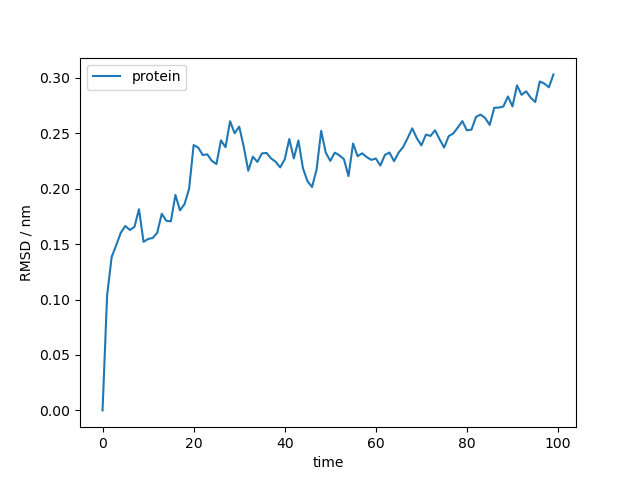

In [14]:
from IPython.display import Image
plot_path = registry.get_mapped_path('fig0_153540')
Image(filename=plot_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅ 
### Correct Answer ✅
